In [1]:
##################################
### Import the usual libraries ###
##################################

### Numpy
import numpy as np

### Astropy
import astropy

#Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column

#astropy coorindates/units
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

### Pandas
# import pandas as pd

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18}) #make plots more readable

# ### Yumi's RA/DEC ---> Magellanic Stream Coorindates
# import MagellanicStream as ms

# ### Functions used in this code
# import age_functions as afunc

### Stuff Writtten by A Really Cool Professor
# import dlnpyutils as dlpu

###
import utilities as util

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

### Age of Universe
H0 = 74.03*(u.km/u.s)/u.Mpc
hertz = H0.to(u.km/u.s/u.pc).to(u.km/u.s/u.km)
tage = (1/hertz).to(u.yr)
ageU = tage.value

In [2]:
###################
### Import Data ###
###################

from sklearn.model_selection import train_test_split

parsecall = ascii.read('parsec3_3.dat',format='basic', delimiter='\s')

rgb = np.where(parsecall['label']==3)
parsec = parsecall[rgb]

xs = np.array([parsec['logTe'],parsec['MH'],parsec['logg']]).T

X_train, X_test, y_train, y_test = train_test_split(xs, parsec['logAge'], train_size=0.20)

In [3]:
### Find all models

### fitting
import statsmodels.api as sm

### Model generation
import itertools as it

# linear terms
x1 = X_train[:,0]
x2 = X_train[:,1]
x3 = X_train[:,2]

# linear int
x12 = np.multiply(x1,x2)
x13 = np.multiply(x1,x3)
x23 = np.multiply(x2,x3)

# squares
x1sq = x1**2
x2sq = x2**2
x3sq = x3**2

# cubes
x1cu = x1**3
x2cu = x2**3
x3cu = x3**3


#find all possible models
models = []
models_str = []

all_var_str = ['x1','x2','x3','x12','x13','x23','x1sq','x2sq','x3sq','x1cu','x2cu','x3cu']
all_var = [x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

all_params = []
summaries = []
max_resid = []
mads = []
resids = []
predict = []
llf = [] 
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(y_train,pmodl).fit()
    summaries.append(model.summary())
    predictions = model.predict(pmodl)
    predict.append(predictions)
    residual = predictions - y_train
    resids.append(residual)
    all_params.append(np.asarray(model.params))
    max_resid.append(np.max(np.absolute(residual)))
    mads.append(util.mad(residual))
    llf.append(model.llf)

In [4]:
print('Min Mad: ', np.asarray(mads).argmin())
print('MAD: ', mads[np.asarray(mads).argmin()])
# print('Max Loglikelihood: ', np.asarray(llf).argmax())
# print('Max Residual: ', np.asarray(max_resid).argmin())
print(models_str[np.asarray(mads).argmin()])
print(summaries[np.asarray(mads).argmin()])

Min Mad:  4094
MAD:  0.08755335943523157
['x1' 'x2' 'x3' 'x12' 'x13' 'x23' 'x1sq' 'x2sq' 'x3sq' 'x1cu' 'x2cu'
 'x3cu']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2639.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:41:20   Log-Likelihood:                 1493.2
No. Observations:                2989   AIC:                            -2960.
Df Residuals:                    2976   BIC:                            -2882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

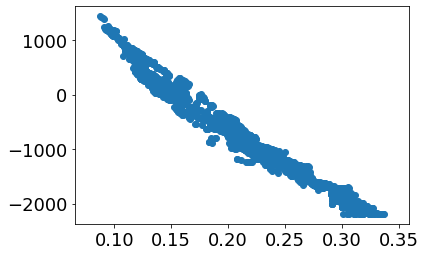

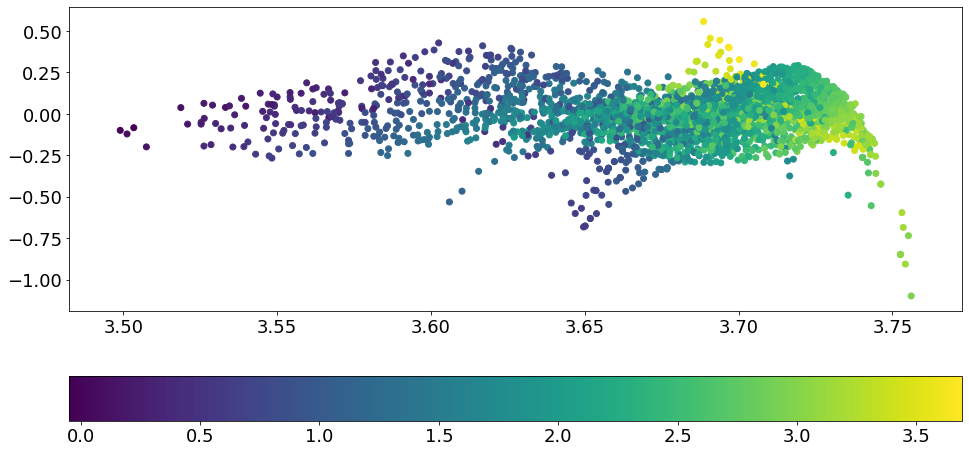

In [41]:
plt.scatter(mads,llf)
plt.show()

plt.figure(figsize=[16,8])
plt.scatter(x1,resids[np.asarray(mads).argmin()],c=x3)
plt.colorbar(orientation = 'horizontal')
plt.show()

In [31]:
len(x1)

2989

In [32]:
len(llf)

4095

In [19]:
### Find all models

### fitting
import statsmodels.api as sm

### Model generation
import itertools as it

# linear terms
y1 = parsec['MH']
y2 = 18.90*np.ones(len(parsec['MH']))

# linear int
y12 = np.multiply(y1,y2)

# squares
y1sq = y1**2
y2sq = y2**2

# squares and linear
y1sq2 = np.multiply(y1sq,y2)
y2sq1 = np.multiply(y2sq,y1)

# cubes
y1cu = y1**3
y2cu = y2**3

#cubes and linear


# cubes and squares


#find all possible models
ymodels = []
ymodels_str = []

all_var_str = ['y1','y2','y12','y1sq','y2sq','y1sq2','y2sq1','y1cu','y2cu']
all_var = [y1,y2,y12,y1sq,y2sq,y1sq2,y2sq1,y1cu,y2cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        ymodels.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        ymodels_str.append(np.array(subset_str))
        
ymodels = np.array(ymodels)
ymodels_str = np.array(ymodels_str)

### Fit All Models

import statsmodels.api as sm 

yall_params = []
ysummaries = []
ymax_resid = []
ymads = []
yresids = []
ypredict = []
yllf = [] 
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(parsec['Ksmag'],pmodl).fit()
    ysummaries.append(model.summary())
    predictions = model.predict(pmodl)
    ypredict.append(predictions)
    yresidual = predictions - parsec['Ksmag']
    yresids.append(residual)
    yall_params.append(np.asarray(model.params))
    ymax_resid.append(np.max(np.absolute(residual)))
    ymads.append(util.mad(residual))
    yllf.append(model.llf)

In [26]:
print('Min Mad: ', np.asarray(ymads).argmin())
print('MAD: ', ymads[np.asarray(ymads).argmin()])
print('Max Loglikelihood: ', np.asarray(yllf).argmax())
print('Max Residual: ', np.asarray(ymax_resid).argmin())
# print(ymodels_str[np.asarray(ymads).argmin()])
# print(ysummaries[np.asarray(ymads).argmin()])

Min Mad:  0
MAD:  0.08755335943523157
Max Loglikelihood:  282
Max Residual:  0


In [30]:
print(ymodels_str[282])
print(yall_params[282])

['y1' 'y2' 'y2sq' 'y1sq2' 'y2cu']
[ 1.00000000e+00  3.28721682e-13 -1.36060795e-14 -5.28548559e-19
 -2.00278982e-16]


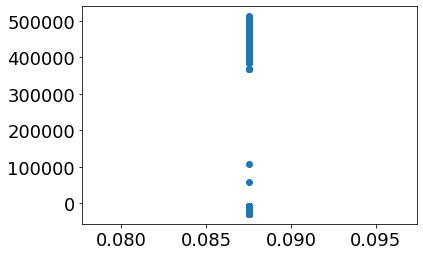

In [24]:
plt.scatter(ymads,yllf)

In [23]:
pmodl = np.array([parsec['MH']]).T
pmodl = sm.add_constant(pmodl)
model = sm.OLS(parsec['Ksmag'],pmodl).fit()
print(model.summary())
predictions = model.predict(pmodl)
yresidual = predictions - parsec['Ksmag']
print('params: ',np.asarray(model.params))
print('max resid: ',np.max(np.absolute(residual)))
print('mad resid: ',util.mad(residual))
print('logL: ',model.llf)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.641
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0312
Time:                        10:02:28   Log-Likelihood:                -29413.
No. Observations:               14946   AIC:                         5.883e+04
Df Residuals:                   14944   BIC:                         5.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8757      0.026   -112.752      0.0

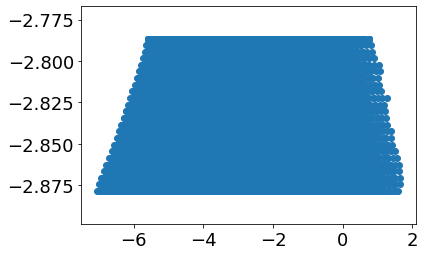

In [31]:
plt.scatter(parsec['Ksmag'],-0.04056809*parsec['MH']-np.ones_like(parsec['MH'])*2.87566963)

In [1]:
a = None

In [2]:
b = range(5)

In [6]:
[1.9,2.2,3.1,4.5]+0.0

TypeError: can only concatenate list (not "float") to list

In [25]:
from scipy.stats import binned_statistic_2d, binned_statistic
import numpy as np

In [17]:
x = [0.1, 0.1, 0.1, 0.6, 0.4, 0.5, 0.4, 0.2] #[0.1, 0.1, 0.1, 0.6]
y = [2.1, 2.6, 2.1, 2.1, 2.9, 2.3, 2.2, 2.5] #[2.1, 2.6, 2.1, 2.1]
binx = [0.0, 0.5, 1.0]
biny = [2.0, 2.5, 3.0]
ret = binned_statistic_2d(x, y, x, 'count', bins=[binx, biny])

In [11]:
ret.statistic

array([[2., 1.],
       [1., 0.]])

In [ ]:
statistic = lambda s: np.median(np.absolute(s - np.median(s)))

In [29]:
ret = binned_statistic(x, y, statistic = lambda s: np.median(np.absolute(s - np.median(s))), bins=binx)

In [30]:
ret.statistic

array([0.25, 0.1 ])

In [32]:
def mad(x):
    '''
    Calculate the Median Absolute Deviation (MAD) of s
    
    Input:
    -----
        s: values to calculate MAD of
    '''
    return np.median(np.absolute(x - np.median(x))) 

In [50]:
x = np.linspace(0,3.0,3000)
y = np.linspace(-0.5,0.5,3000)
bins = 

array([0.00000000e+00, 1.00033344e-03, 2.00066689e-03, ...,
       2.99799933e+00, 2.99899967e+00, 3.00000000e+00])

In [40]:
bin_stats, _, bin_ind = binned_statistic(x, y, statistic = 'median', bins = 2)
uniq = np.unique(bin_ind)
        
med_x_err = []
med_y_err = []
for i in range(len(uniq)):
    single_bin = np.where(bin_ind == uniq[i])
    med_x_err.append(mad(np.asarray(x)[single_bin]))
    med_y_err.append(mad(np.asarray(y)[single_bin]))

In [41]:
med_x_err

[0.0, 0.04999999999999999]

In [42]:
x

[0.1, 0.1, 0.1, 0.6, 0.4, 0.5, 0.4, 0.2]

In [43]:
y

[2.1, 2.6, 2.1, 2.1, 2.9, 2.3, 2.2, 2.5]

In [49]:
np.median([0.1,0.1,0.1,0.2]-np.median([0.1,0.1,0.1,0.2])*np.ones(4))

0.0